## Machine Learning Mini Project 2

## Jeba Akewak

## Project Description

In this Project we are given a dataset that includes the information about the customers of a telecommunication company. The company wants to know why a large number of customers are leaving their landline business and how the company can slow down the process and retain the customers. For this project you need to use a tree-based approach to predict behaviour to retain customers. By analysing the data, you will suggest a customer retention strategy.


The information in the dataset is as follows:

Churn: The customers who left the company in the past month

Type of services that the customers has signed up for

The information on customers’ accounts

The customers’ demographic information

You can use either Matlab/Octave, R or Python for this project. As a part of your task you need to look into available packages for doing tree-based analysis in the programming language of your choice and you need to provide a short explanation on how the package works in your final report.

 

Alongside your code you need to submit a detailed report describing the following points:

- introduction (problem statement)

- descriptive analysis of the data

- short explanation on what the data is about and how you are planning to use it in doing the task of the project

- explanation on the packages/tools you are using for the analysis

- what are the steps you are taking in order to perform the task and optimising your model (include screen shots whenever needed)

- interpreting the output

- description of your customer retaining strategy

- describe the performance of your model, how efficient is it?

- conclusion.


## Importing Libraries

The  first thing we need to do is to import all of the relevant python libraries that we will need for our analysis. Libraries such as numpy,pandas, statsmodels, and scikit-learn are frequently utilised.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
%matplotlib inline

## Data

Then Import the data set given at the following link https://www.dropbox.com/s/9j4if88qqp2f1cf/WA_Fn-UseC_-Telco-Customer-Churn.xlsx?dl=0.
After downloading the xslx file I renamed it to Churn.xslx. Then let's start by reading in the Churn.xlsx file into a pandas dataframe.

In [2]:
df = pd.read_excel('Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The information on the datasetshows the Churn: the customers who left last month, Type of services the  customers signed up for, the information on the customer's accounts and the customer's demographic information

Attribute Information:

1. Customer ID
2. Gender
3. SeniorCitizen
4. Partner
5. Dependents
6. Tenure
7. PhoneServices
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtction
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. Churn

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!
Now we can perform some basic exploratory analysis to get a better understanding of what is in our data. For example we would like to
know:
- How much data we have
- If there are any missing values
- What data type each column is
- The distribution of data in each column

We could also take this opportunity to plot some charts to help us get an idea of what variables / features will prove useful. For example,if we where thinking of doing some regression analysis, scatter charts could give us a visual indication of correlation between features.
The pandas library has plenty of built in functions to help us quickly understand summary information about our dataset. Below we use the shape() (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) method to check how many rowsare in our dataset and the describe()(http://pandas.pydata.org/pandasdocs/stable/generated/pandas.DataFrame.describe.html)method to confirm whether or not our columns have missing values.


In [4]:
from IPython.display import display, HTML
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(pd.DataFrame(counts.tolist(),columns=["Count of values"],index=counts.index.values).transpose())


('Number of rows: ', 7043)


,SeniorCitizen,tenure,MonthlyCharges
Count of values,7043.0,7043.0,7043.0


At this stage we would normally begin the process of cleaning our data set, which could involve:
- Filling in missing values
- Parsing dates and numbers in incorrect formats
- Extracting features out of text etc..

## Missing Data

We can also use seaborn to create a simple heatmap to see where we are missing data!

In [7]:
df.isnull().values.any()

False

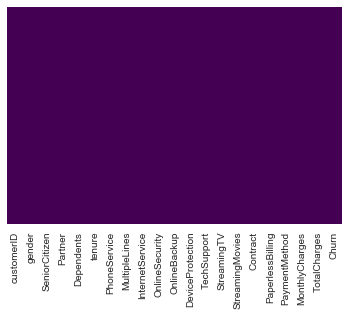

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looking at the data, it looks like we are not missing any data therefore we are good to go.

Let's continue on by visualizing some more of the data.

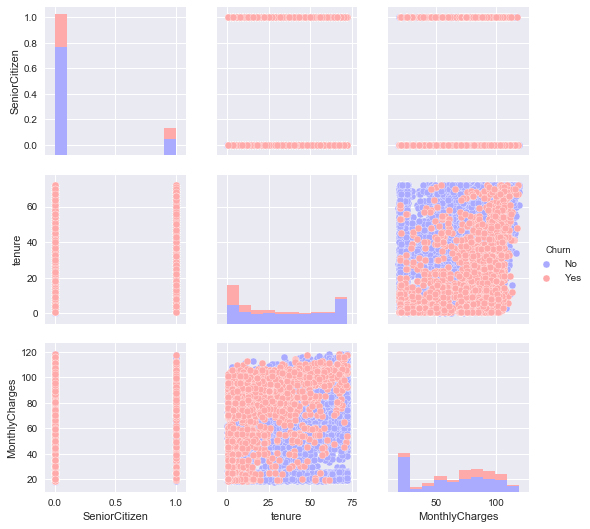

In [6]:
sns.pairplot(df,hue='Churn',palette='bwr')

/Users/akewakjeba/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


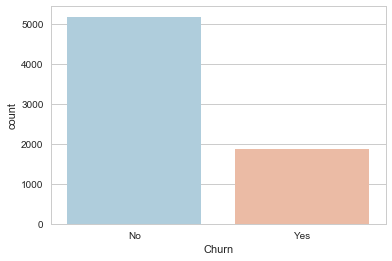

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=df,palette='RdBu_r')

/Users/akewakjeba/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


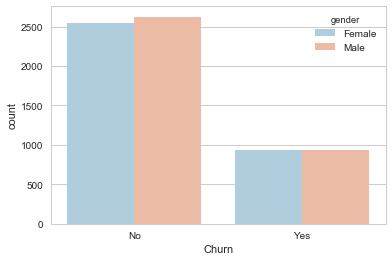

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df,palette='RdBu_r')

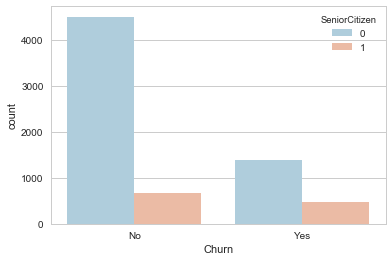

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='SeniorCitizen',data=df,palette='RdBu_r')

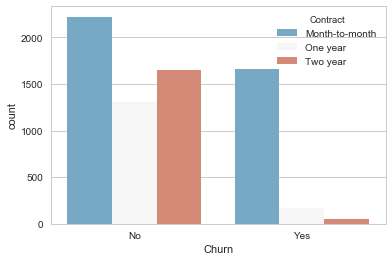

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Contract',data=df,palette='RdBu_r')

## Feature Selection and Converting Categorical Features

After cleaning and inspecting our data we might come to the conclusion that certain columns are not going to be useful for prediction. In this example we will not be using the customerID of the client  because our assumption
is that this shouldn't affect churn.
We will need to convert categorical features to dummy variables using pandas! Otherwise our machine
learning algorithm won't be able to directly take in those features as inputs.

In [11]:
def gen_to_cat(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0
def par_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
def dep_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
def phos_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
def mul_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
    if x=='No phone service':
        return 2
def ints_to_cat(x):
    if x=='Fiber optic':
        return 1
    if x=='DSL':
        return 0
    if x=='No':
        return 2
def onls_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0
def onlb_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0
def dev_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0
def tech_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0    
def strTV_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0
def strM_to_cat(x):
    if x=='Yes':
        return 1
    else:
        return 0
def con_to_cat(x):
    if x=='Month-to-month':
        return 1
    if x=='One year':
        return 0
    if x=='Two year':
        return 2
def paplb_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0  
def paym_to_cat(x):
    if x=='Electronic check':
        return 1
    if x=='Mailed check':
        return 0
    if x=='Bank transfer (automatic)':
        return 2
    if x=='Credit card (automatic)':
        return 3
def churn_to_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0  
def Tot_to_cat(x):
    
    if '.' in x:
        return float(x) 
    else:
        return 0

In [12]:
df['gender'] = df['gender'].apply(gen_to_cat)
df['Partner'] = df['Partner'].apply(par_to_cat)
df['Dependents'] = df['Dependents'].apply(dep_to_cat)
df['PhoneService'] = df['PhoneService'].apply(phos_to_cat)
df['MultipleLines'] = df['MultipleLines'].apply(mul_to_cat)
df['InternetService'] = df['InternetService'].apply(ints_to_cat)
df['OnlineSecurity'] = df['OnlineSecurity'].apply(onls_to_cat)
df['OnlineBackup'] = df['OnlineBackup'].apply(onlb_to_cat)
df['DeviceProtection'] = df['DeviceProtection'].apply(dev_to_cat)
df['TechSupport'] = df['TechSupport'].apply(tech_to_cat)
df['StreamingTV'] = df['StreamingTV'].apply(strTV_to_cat)
df['StreamingMovies'] = df['StreamingMovies'].apply(strM_to_cat)
df['Contract'] = df['Contract'].apply(con_to_cat)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(paplb_to_cat)
df['PaymentMethod'] = df['PaymentMethod'].apply(paym_to_cat)
#df['TotalCharges'] = df['TotalCharges'].apply(Tot_to_cat)
df['Churn'] = df['Churn'].apply(churn_to_cat)




In [13]:
#df = pd.concat([df,gender,Partner],axis=1)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,0,0,0,1,1,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,0,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,1,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,1,0,0,0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,1,1,70.70,151.65,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [15]:
df.drop(['customerID'],axis=1,inplace=True)

In [16]:
df.drop(['TotalCharges'],axis=1,inplace=True)

In [17]:
df.dtypes.eq(object)
c = df.columns[df.dtypes.eq(object)]

In [18]:
df[c] = df[c].apply(pd.to_numeric, errors='coerce', axis=0)

In [19]:
#c = df.columns[df.dtypes.eq(int)]
#df[c] = df[c].apply(pd.to_numeric, errors='coerce', axis=0)

In [20]:
df = df.astype('float64')#TotalCharges.astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null float64
SeniorCitizen       7043 non-null float64
Partner             7043 non-null float64
Dependents          7043 non-null float64
tenure              7043 non-null float64
PhoneService        7043 non-null float64
MultipleLines       7043 non-null float64
InternetService     7043 non-null float64
OnlineSecurity      7043 non-null float64
OnlineBackup        7043 non-null float64
DeviceProtection    7043 non-null float64
TechSupport         7043 non-null float64
StreamingTV         7043 non-null float64
StreamingMovies     7043 non-null float64
Contract            7043 non-null float64
PaperlessBilling    7043 non-null float64
PaymentMethod       7043 non-null float64
MonthlyCharges      7043 non-null float64
Churn               7043 non-null float64
dtypes: float64(19)
memory usage: 1.0 MB


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,29.85,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.95,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,53.85,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,42.30,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,70.70,1.0


In [23]:
#df['TotalCharges'] = df.TotalCharges.astype(float)

Our data is ready for our model.

In [24]:
corr_pearson = df.corr('pearson')
corr_pearson

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.007230,-0.011754,-0.010709,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.046573,0.156530,0.035614,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.108052,-0.014877,0.143949,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.089060,-0.111377,0.043494,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.233426,0.006152,0.366983,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.003940,0.016505,-0.001724,0.247398,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,-0.340949,0.157614,0.199417,0.215643,0.162576,0.213945,0.224513,0.049224,0.108230,0.126071,0.146153,0.019423
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.340949,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.070157,-0.138625,-0.092141,-0.323260,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.157614,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.061565,-0.003636,0.158301,0.296594,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.199417,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.020259,0.126735,0.172691,0.441780,-0.082255


## Fitting a Model

At this point we can construct our model. The  rst thing to do is split our dataset into training and test sets. We will take a simple approach and take a 75:25 randomly sampled split.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Churn',axis=1)
y = df['Churn']

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set.**

The decision tree structure can be analysed to gain further insight on the relation between the features and the target to predict. In this example, we show how to retrieve:

- the binary tree structure;
- the depth of each node and whether or not it’s a leaf;
- the nodes that were reached by a sample using the decision_path method;
- the leaf that was reached by a sample using the apply method;
- the rules that were used to predict a sample;
- the decision path shared by a group of samples.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [30]:
X_train.shape, y_train.shape

((5634, 18), (5634,))

In [31]:
X_test.shape, y_test.shape

((1409, 18), (1409,))

In [32]:
y_train.dtype

dtype('float64')

In [33]:
X_train.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
dtype: object

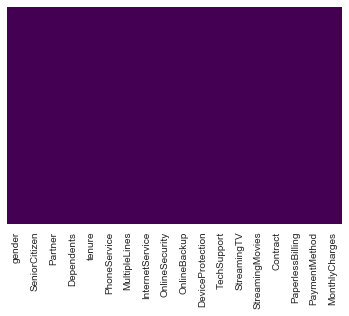

In [34]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Evaluating Our Model
If we display the results we can see we have a list of booleans (0's and 1's) representing whether or not our model thinks a customer has churned or not. Now we can compare this to whether they actually churned to evaluate our model. We could also compute the actual classification of a customer churning using predict(). We could then use these probabilities as a threshold for driving business decisions around which customers we need to target for retention, and how strong an incentive we need to offer them.

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [36]:
predictions = dtree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.81      0.89      0.85      1017
        1.0       0.62      0.47      0.54       392

avg / total       0.76      0.77      0.76      1409



In [39]:
print(confusion_matrix(y_test,predictions))

[[904 113]
 [207 185]]


In [40]:
score = dtree.score(X_test, y_test)
print("Accuracy: ", score)

('Accuracy: ', 0.77288857345635198)


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, we won't use this often and it requires us to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

[u'SeniorCitizen',
 u'Partner',
 u'Dependents',
 u'tenure',
 u'PhoneService',
 u'MultipleLines',
 u'InternetService',
 u'OnlineSecurity',
 u'OnlineBackup',
 u'DeviceProtection',
 u'TechSupport',
 u'StreamingTV',
 u'StreamingMovies',
 u'Contract',
 u'PaperlessBilling',
 u'PaymentMethod',
 u'MonthlyCharges',
 u'Churn']

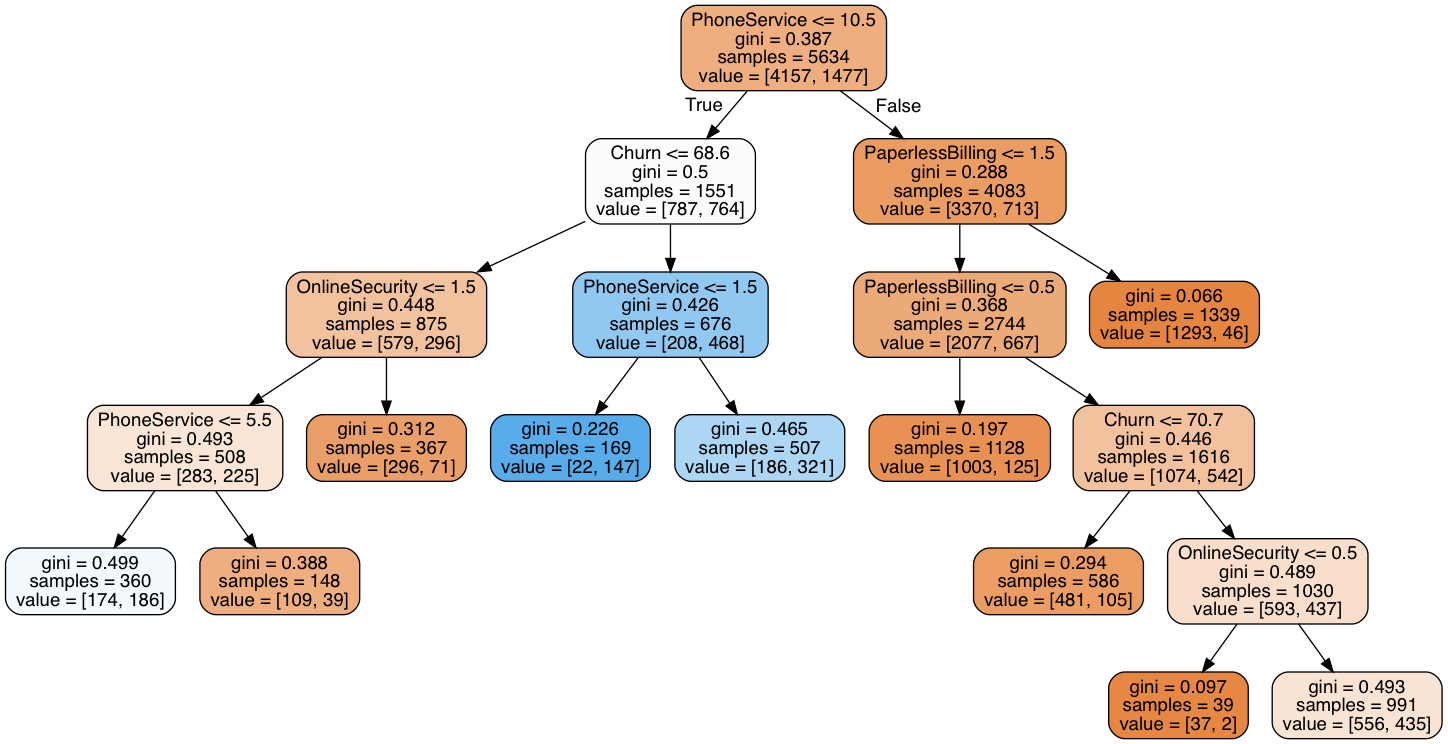

In [42]:

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Once the decision tree has been constructed, classifying a test record is straightforward. Starting from the root node, we apply the test condition to the record and follow the appropriate branch based on the outcome of the test. It then lead us either to another internal node, for which a new test condition is applied, or to a leaf node. When we reach the leaf node, the class lable associated with the leaf node is then assigned to the record, As shown in the figure.

## Conclusion

The classification technique is a systematic approach to build classification models from an input dat set. For example, decision tree classifiers, rule-based classifiers, neural networks, support vector machines, and naive Bayes classifiers are different technique to solve a classification problem. Each technique adopts a learning algorithm to identify a model that best fits the relationshio between the attribute set and class label of the input data. Therefore, a key objective of the learning algorithm is to build prdictive model that accurately predict the class labels of previously unkonw records.

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

